In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fx = pd.read_csv('../../fx_component_effort.csv')
df_ch = pd.read_csv('../../ch_component_effort.csv')

In [5]:
# Drop the name column before get the stats
df_fx1 = df_fx.drop(['name'], axis=1)
df_ch1 = df_ch.drop(['name'], axis=1)

In [6]:
pd.options.display.float_format = '{:.5f}'.format

# Function to calculate statistics for a given dataset
def calculate_statistics(df, dataset_name):
    stats = {
        'mean': df.mean(),
        'median': df.median(),
        'std': df.std(),
        'min': df.min(),
        'max': df.max()
    }
    stats['dataset'] = dataset_name
    return pd.DataFrame(stats)

# Calculate statistics for both datasets
stats_fx = calculate_statistics(df_fx1, 'Firefox')
stats_ch = calculate_statistics(df_ch1, 'Chromium')

# Combine the dataframes to plot both datasets on the same figure
stats_combined = pd.concat([stats_fx, stats_ch])

# Melt the data for Seaborn violin plot
stats_combined_melted = stats_combined.reset_index().melt(id_vars=['index', 'dataset'])
stats_combined_melted.rename(columns={'index': 'statistics', 'value': 'values'}, inplace=True)


In [7]:
stats_ch

,mean,median,std,min,max,dataset
t_commit,10146.43820,2817.00000,17401.54949,24.00000,77879.00000,Chromium
t_devs,51356.77528,12853.00000,88293.24372,32.00000,386969.00000,Chromium
t_churn,1723903.68539,469995.00000,3247780.98148,3342.00000,19837359.00000,Chromium
dev_effort,44.91336,29.20074,50.47906,12.92544,412.96260,Chromium
churn_dev,44.64748,28.93468,50.47844,12.81892,412.73171,Chromium
commit_dev,0.26588,0.25635,0.13176,0.02191,0.83453,Chromium
churn_commit,248.98865,120.34884,459.54147,37.00452,3626.74277,Chromium


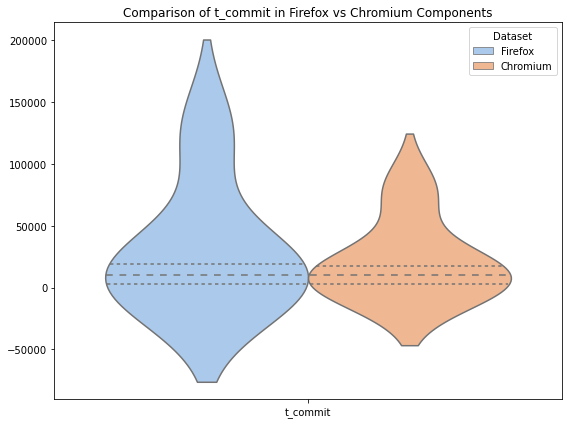

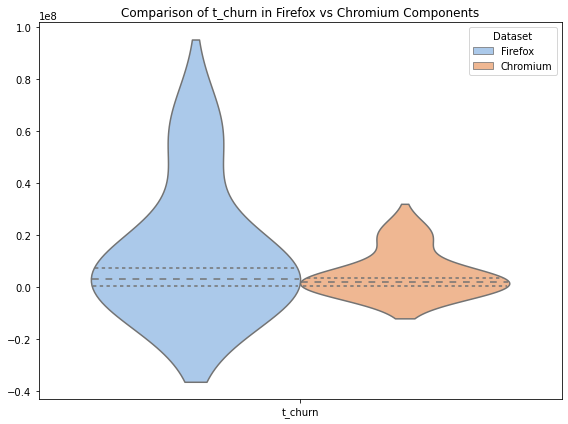

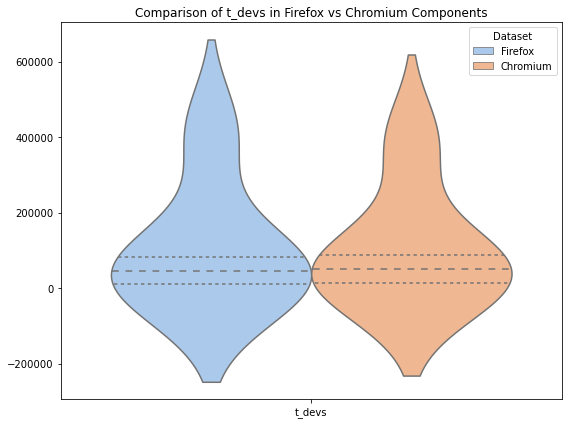

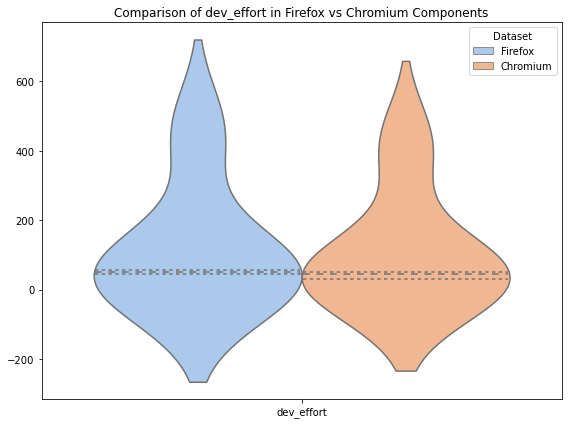

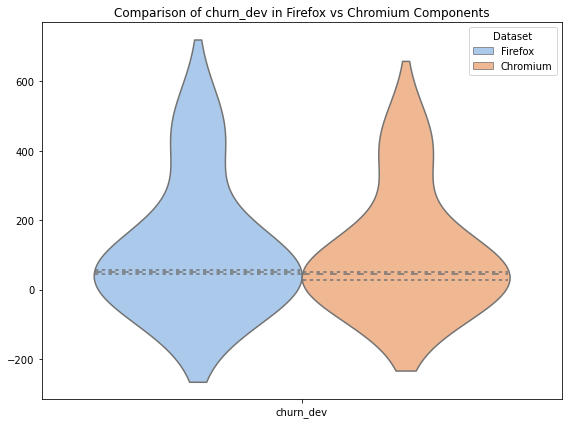

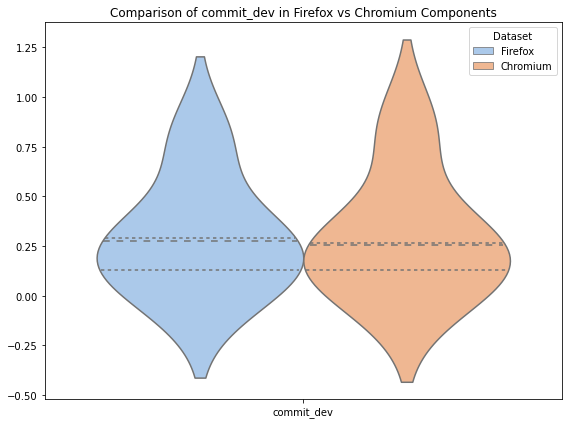

In [10]:
variables = ['t_commit', 't_churn', 't_devs', 'dev_effort', 'churn_dev', 'commit_dev']

# Create separate violin plots for each variable and statistic
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='statistics', y='values', data=stats_combined_melted[stats_combined_melted['statistics'] == var],
                   hue='dataset', palette='pastel', inner='quart', scale='count')
    plt.title(f'Comparison of {var} in Firefox vs Chromium Components')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Dataset', loc='best', bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()

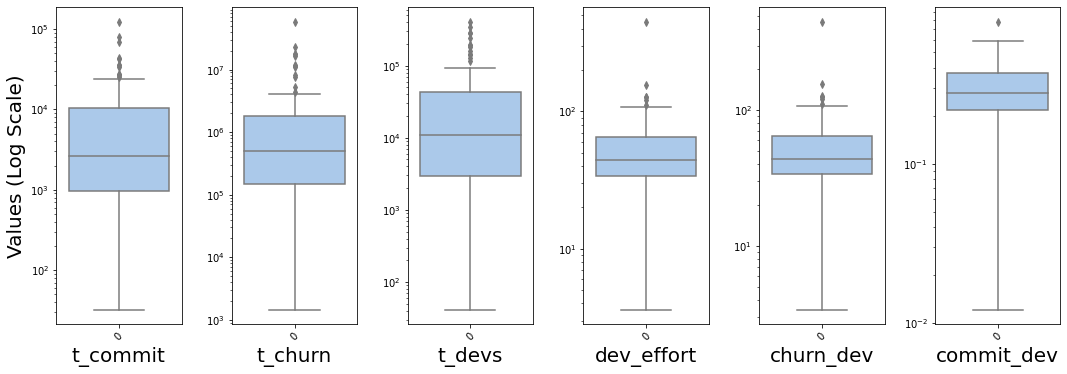

In [27]:
# List of columns to create box plots for
columns_to_plot = ['t_commit', 't_churn', 't_devs', 'dev_effort', 'churn_dev', 'commit_dev']

# Create separate box plots for 'fx' dataset
plt.figure(figsize=(18, 14))  # Larger figure size
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, len(columns_to_plot), i + 1)
    sns.boxplot(data=df_fx1[column], palette='pastel')
    plt.yscale('log')  # Use logarithmic scale for the y-axis
    plt.title('')
    plt.xlabel(column, fontsize=20)
    if(i == 0):
        plt.ylabel('Values (Log Scale)', fontsize=20)
    plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.tight_layout()
plt.show()

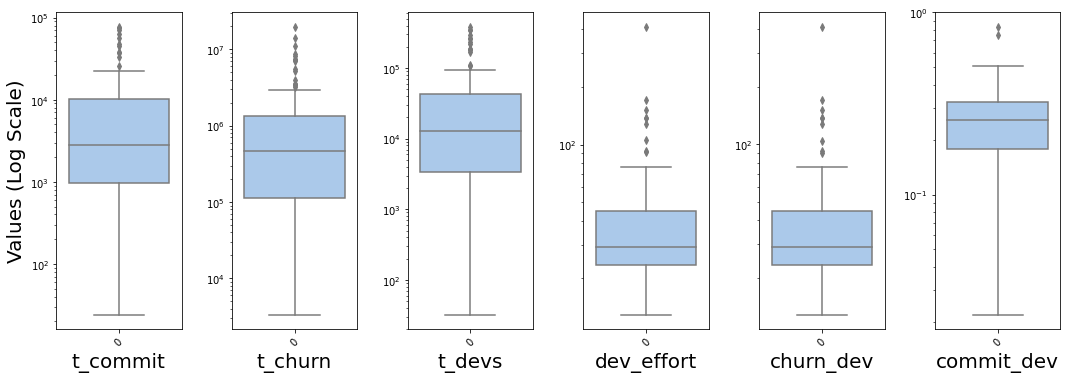

In [28]:
# List of columns to create box plots for
columns_to_plot = ['t_commit', 't_churn', 't_devs', 'dev_effort', 'churn_dev', 'commit_dev']

# Create separate box plots for 'fx' dataset
plt.figure(figsize=(18, 14))  # Larger figure size
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, len(columns_to_plot), i + 1)
    sns.boxplot(data=df_ch1[column], palette='pastel')
    plt.yscale('log')  # Use logarithmic scale for the y-axis
    plt.title('')
    plt.xlabel(column, fontsize=20)
    if(i == 0):
        plt.ylabel('Values (Log Scale)', fontsize=20)
    plt.xticks(rotation=45)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.tight_layout()
plt.show()

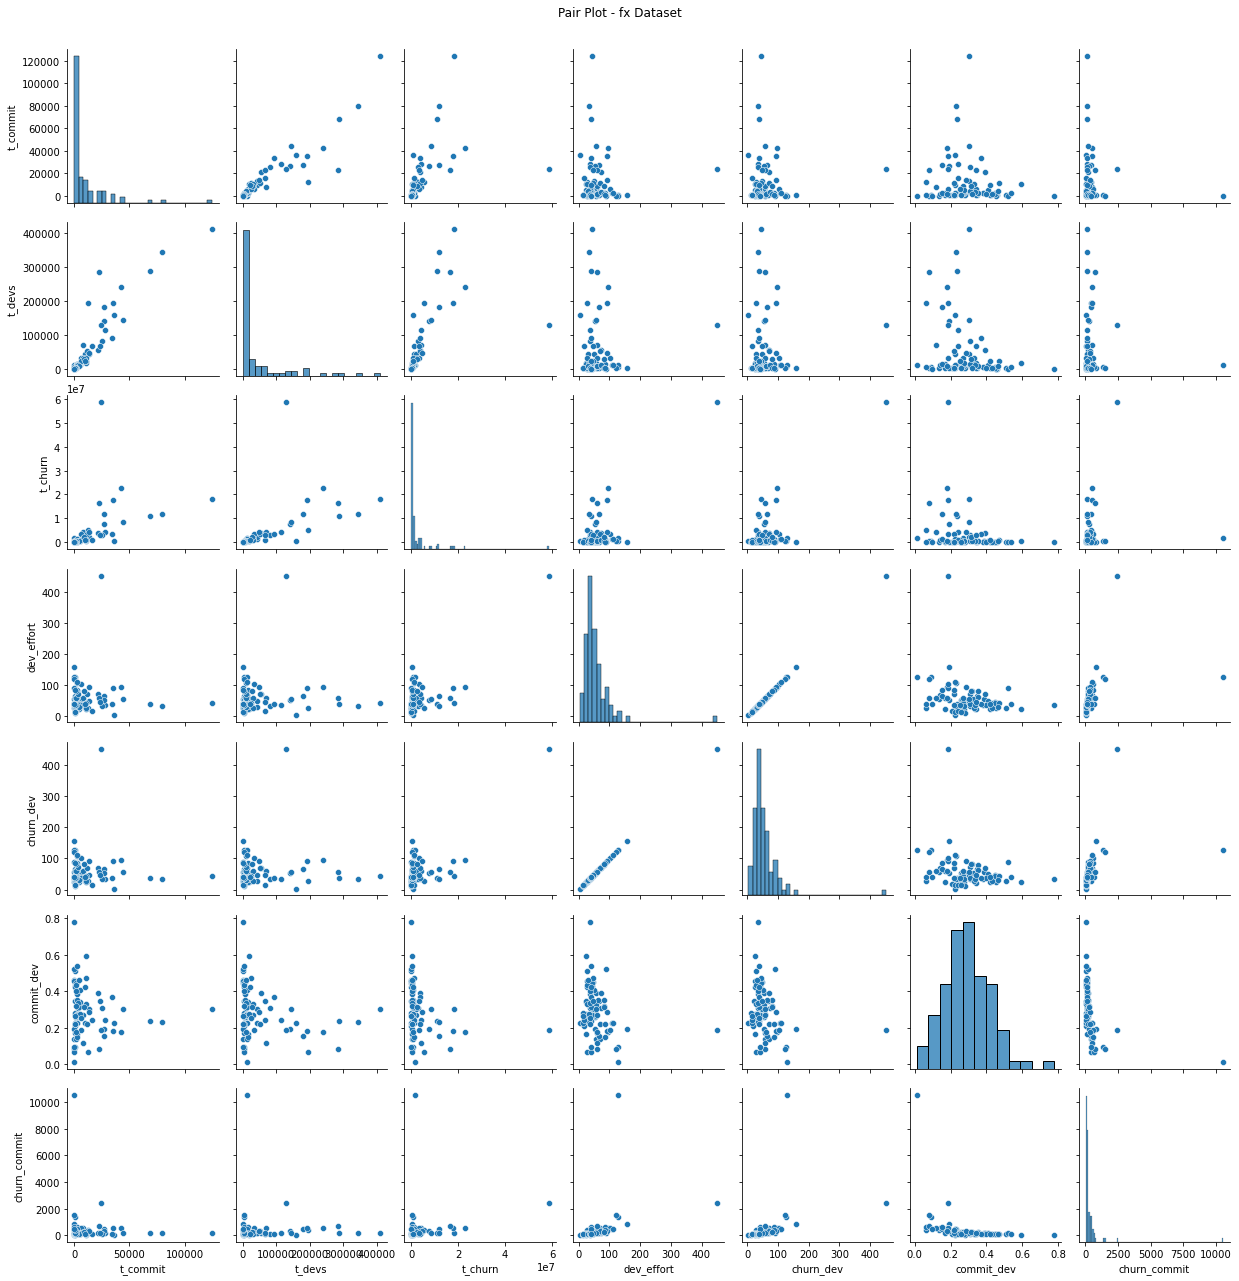

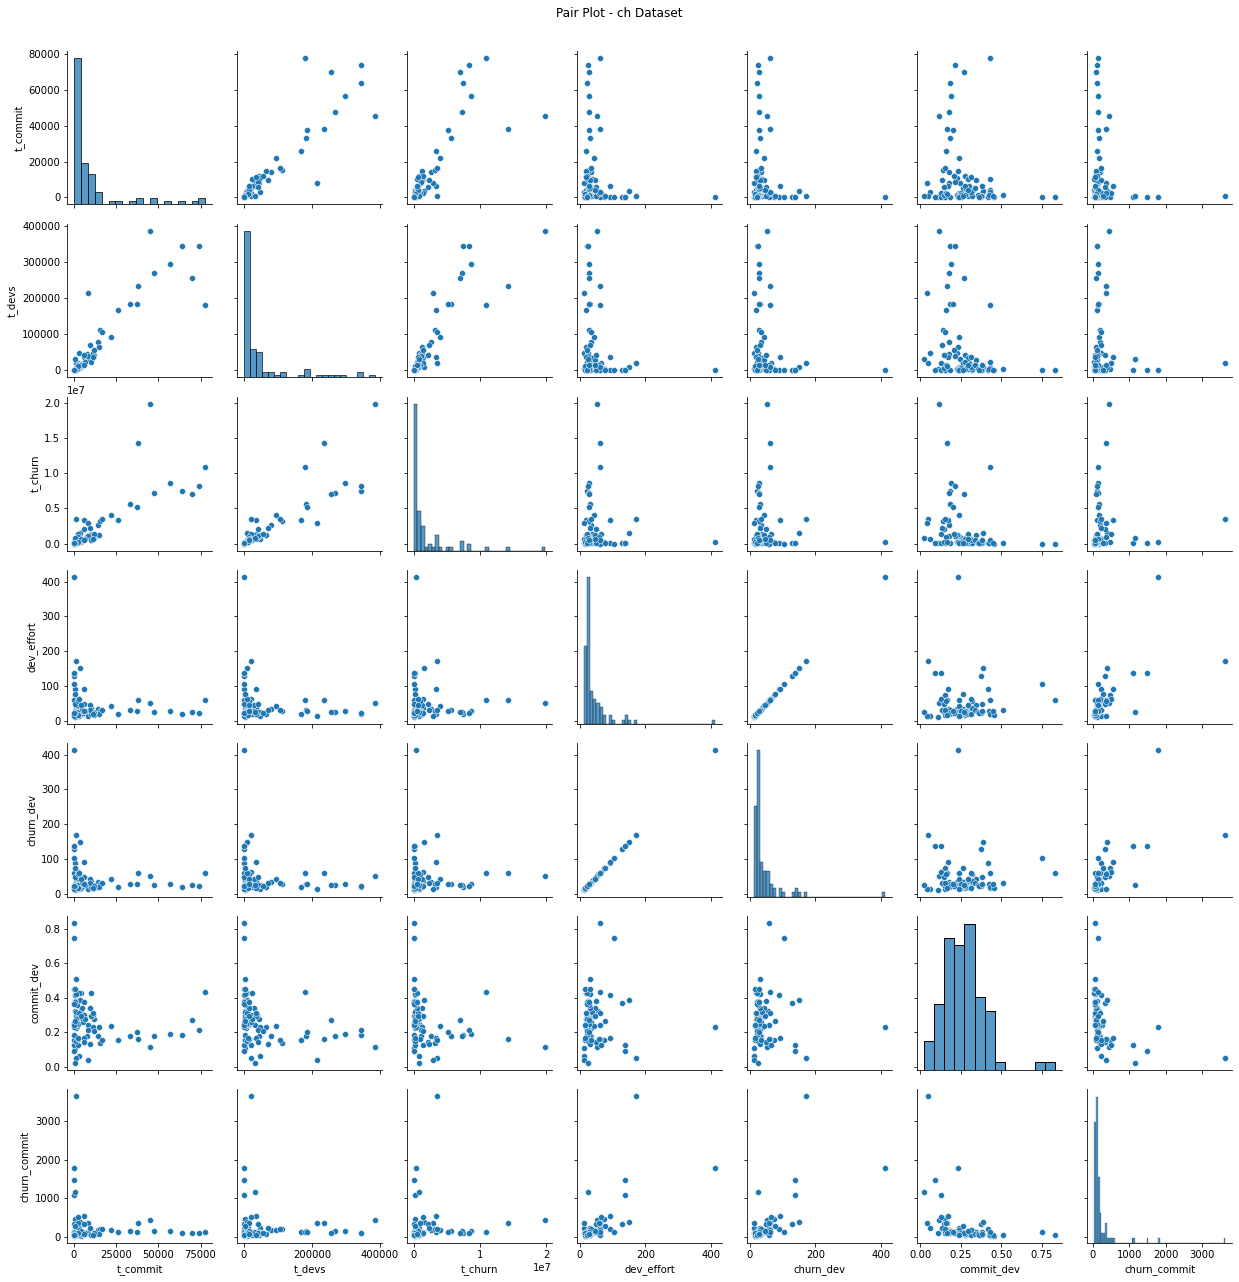

In [12]:
# Pair plot for fx dataset
sns.pairplot(df_fx1, palette='pastel')
plt.suptitle('Pair Plot - fx Dataset', y=1.02)
plt.show()

# Pair plot for ch dataset
sns.pairplot(df_ch1, palette='pastel')
plt.suptitle('Pair Plot - ch Dataset', y=1.02)
plt.show()

<Figure size 1500x1000 with 0 Axes>

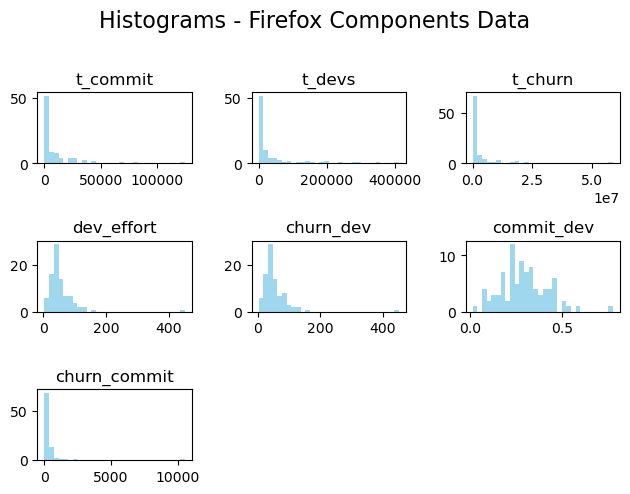

<Figure size 1500x1000 with 0 Axes>

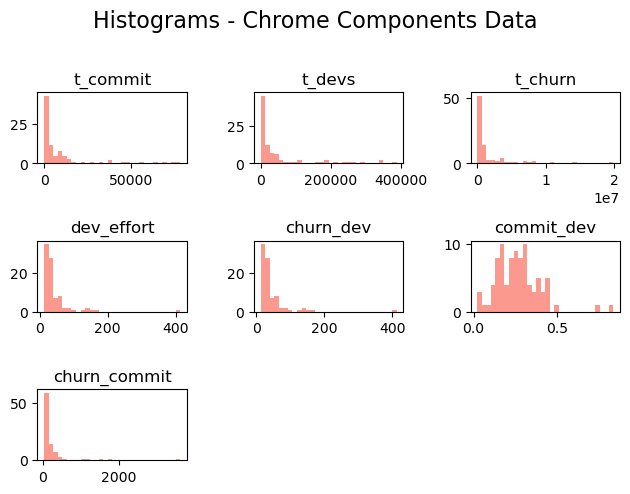

In [17]:
import matplotlib.ticker as ticker

# Function to format y-axis labels
def format_y_axis(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Histogram for fx dataset
plt.figure(figsize=(15, 10))
ax = df_fx1.hist(grid=False, color='skyblue', alpha=0.8, bins=30)  # Adjust the number of bins
plt.suptitle('Histograms - Firefox Components Data', y=1.02, fontsize=16)
plt.tight_layout()

# Apply the custom y-axis label format to each subplot
for axis in ax.flatten():
    axis.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.show()

# Histogram for ch dataset
plt.figure(figsize=(15, 10))
ax = df_ch1.hist(grid=False, color='salmon', alpha=0.8, bins=30)  # Adjust the number of bins
plt.suptitle('Histograms - Chrome Components Data', y=1.02, fontsize=16)
plt.tight_layout()

# Apply the custom y-axis label format to each subplot
for axis in ax.flatten():
    axis.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.show()

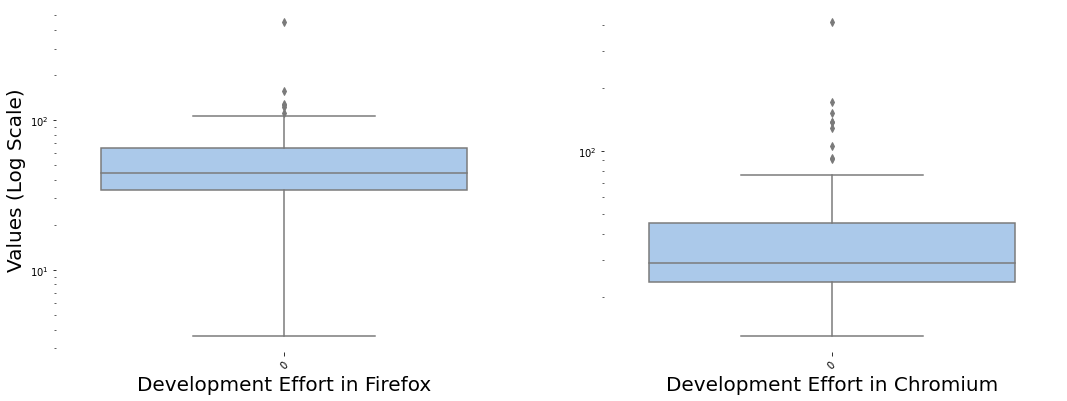

In [18]:
plt.figure(figsize=(18, 14))  # Larger figure size

plt.subplot(221, frameon=False)
sns.boxplot(data=df_fx1['dev_effort'], palette='pastel')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('')
plt.xlabel("Development Effort in Firefox", fontsize=20)
plt.ylabel('Values (Log Scale)', fontsize=20)
plt.xticks(rotation=45)

plt.subplot(222, frameon=False)
sns.boxplot(data=df_ch1['dev_effort'], palette='pastel')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('')
plt.xlabel("Development Effort in Chromium", fontsize=20)
#plt.ylabel('Values (Log Scale)')
plt.xticks(rotation=45)

#plt.tight_layout()
plt.show()